**Assignment 3**

Gurjot Singh(B00811724)
Bhavneet Kaur Sachdeva(B00809769)

Gurjot SIngh (Q1 and Q5)
Bhavneet Kaur (Q2 and Q4)

**Q1**
To find all vessels that visited a port and to find all AIS messages to those ports

Referenced majorly from Lab Tutorial on spatio-temporal data

In [1]:
import geopandas as gpd

In [2]:
import numpy as np
import pandas as pd
from shapely.geometry import Point
import shapely
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
% matplotlib inline

In [76]:
df=pd.read_csv('AISData.csv')
df.rename(columns={'location.coordinates.0':'x','location.coordinates.1':'y'},inplace=True)
df


,Unnamed: 0,event_time,x,y,position_accuracy,mmsi,sog,cog
0,0,2019-04-11T09:47:30.153Z,-63.556082,44.624835,0.0,316013808,3.0,319.500000
1,1,2019-04-11T09:47:27.273Z,-63.556053,44.624817,0.0,316013808,3.0,320.700012
2,2,2019-04-11T09:47:34.340Z,-63.556138,44.624868,0.0,316013808,2.9,319.500000
3,3,2019-04-11T09:47:37.087Z,-63.556187,44.624898,0.0,316013808,3.0,319.799988
4,4,2019-04-19T09:52:19.358Z,-63.555998,44.624883,0.0,316013808,3.2,337.200012
5,5,2019-04-19T09:52:19.358Z,-63.555998,44.624883,0.0,316013808,3.2,337.200012
6,6,2019-05-25T19:40:53.826Z,-63.555967,44.624998,0.0,316013808,1.5,168.399994
7,7,2019-05-21T21:39:50.762Z,-63.555977,44.625048,0.0,316013808,4.3,134.600006
8,8,2019-04-09T10:13:59.833Z,-63.555918,44.625118,0.0,316013808,3.9,312.399994
9,9,2019-04-09T10:13:55.860Z,-63.555845,44.625072,0.0,316013808,4.3,310.600006


In [77]:
gdf = gpd.GeoDataFrame(df.drop(['x', 'y'], axis=1),
                                crs={'init': 'epsg:4326'},
                                geometry=[shapely.geometry.Point(xy) for xy in zip(df.x, df.y)])

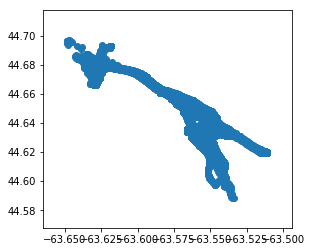

In [6]:
gdf.plot()

In [27]:
ports=gpd.read_file('assignment3shapefile.shp')
ports.crs = {'init': 'epsg:3006'}
bylaw=ports.set_index(['port_name'])
print(type(bylaw))

<class 'geopandas.geodataframe.GeoDataFrame'>


Referenced from : http://darribas.org/gds15/content/labs/lab_03.html

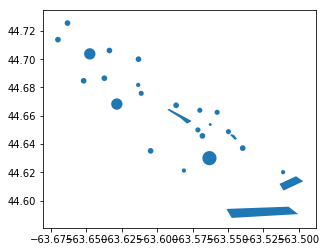

In [8]:
bylaw.plot()

In [9]:
cent = bylaw.centroid

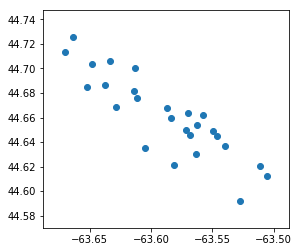

In [10]:
cent.plot()

In [11]:
buff = cent.buffer(0.01)

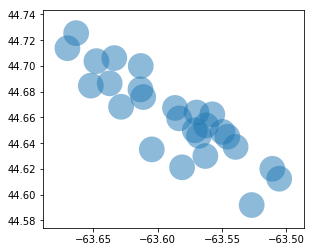

In [12]:
buff.plot(alpha=0.5)

C:\Users\Bhavneet\Anaconda3\lib\site-packages\geopandas\plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)
C:\Users\Bhavneet\Anaconda3\lib\site-packages\geopandas\plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)
C:\Users\Bhavneet\Anaconda3\lib\site-packages\geopandas\plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)
C:\Users\Bhavneet\Anaconda3\lib\site-packages\geopandas\plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)
C:\Users\Bhavneet\Anaconda3\lib\site-packages\geopandas\plotting.py:405: UserWarning: The GeoDataFrame you are attem

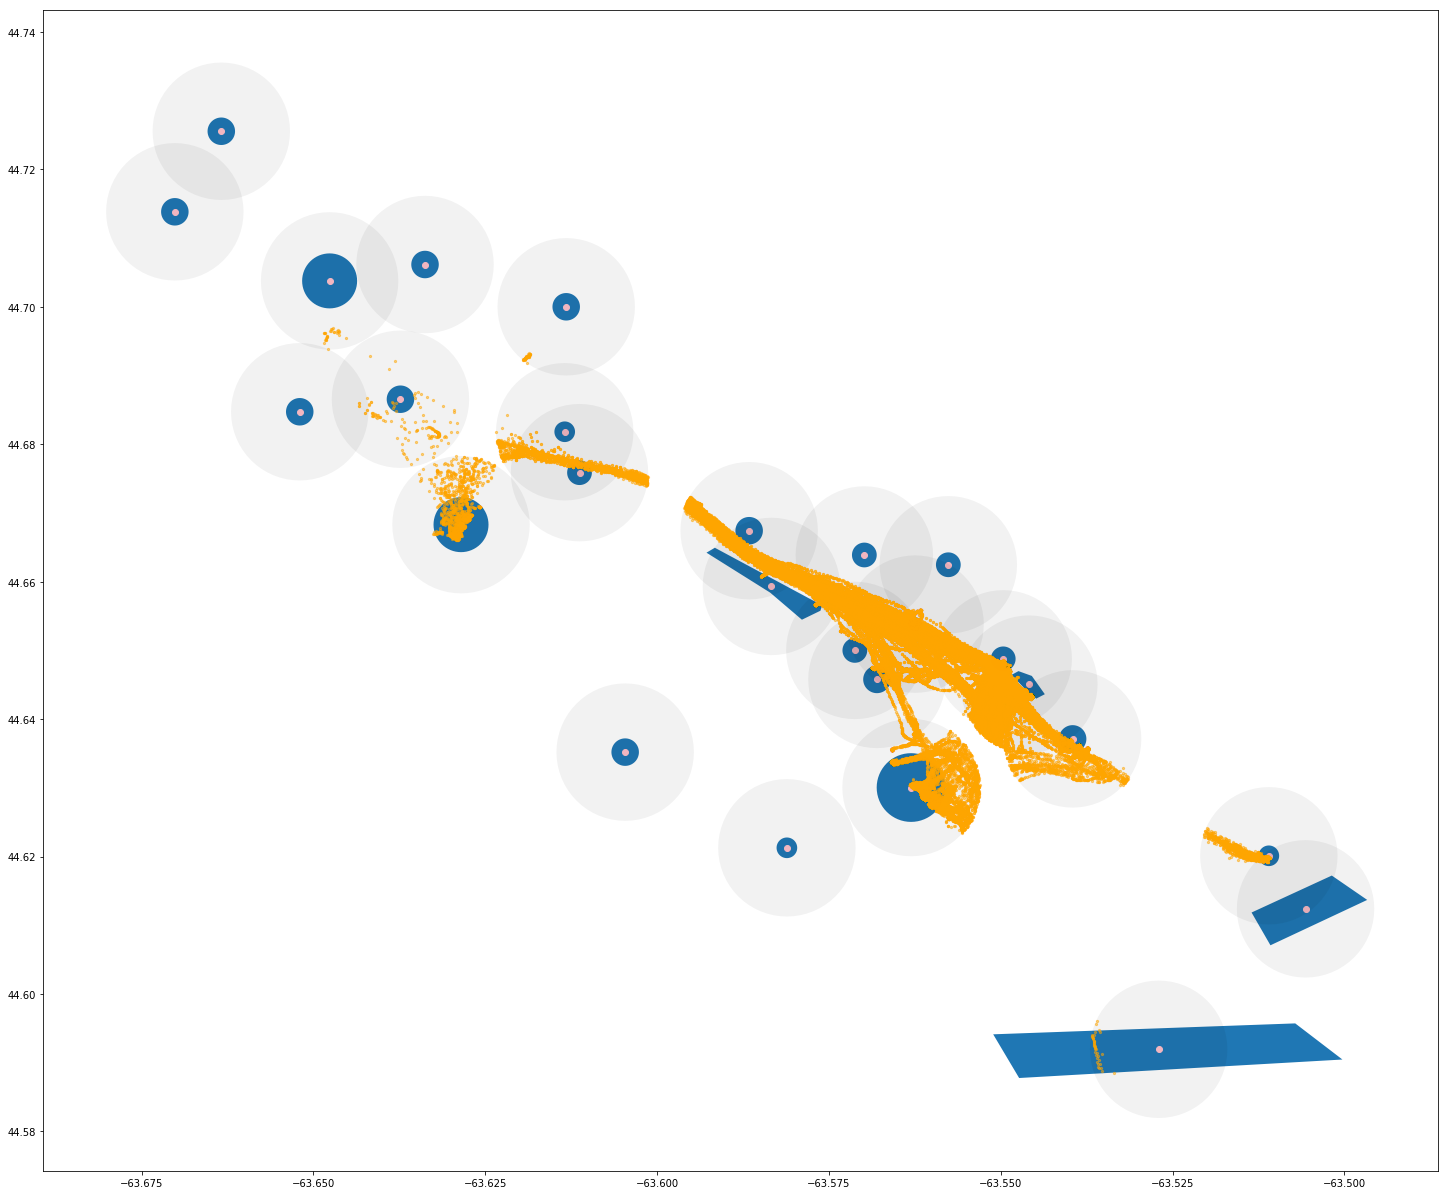

In [13]:
fig,ax = plt.subplots(1, figsize = (25,25))
bylaw.plot(ax=ax)
cent.plot(ax = ax,facecolor = 'pink')
buff.plot(ax = ax,facecolor = 'black',alpha = 0.05)

#http://geopandas.org/reference.html
for i in list(buff):
    gdf.loc[gdf.within(i),:].plot(ax=ax, color='orange', markersize=5, alpha=0.5)

**Q2**
To color code the ports based on the densty of ais calls

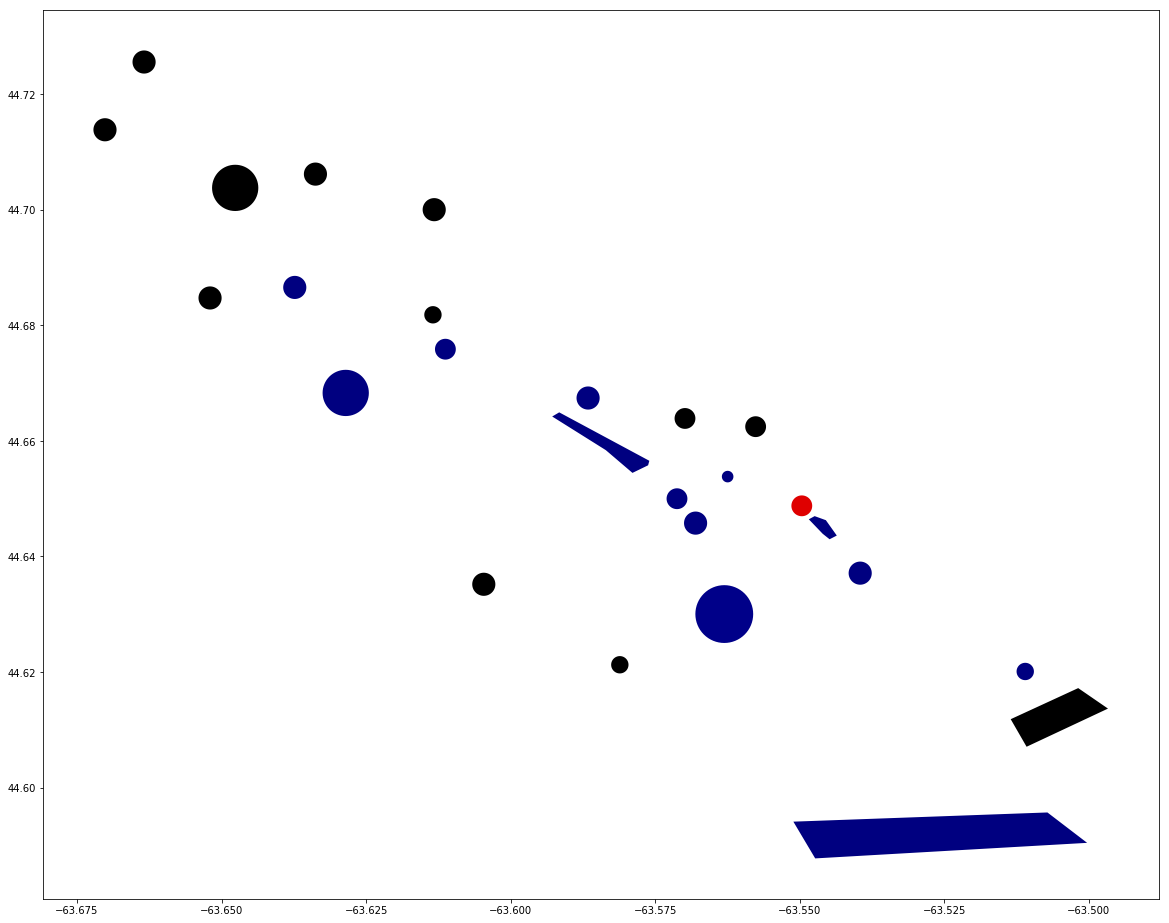

In [187]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize

#Referenced from LAb tutorial and https://stackoverflow.com/questions/8931268/using-colormaps-to-set-color-of-line-in-matplotlib
colors = plt.get_cmap('jet')
cNorm = Normalize(vmin=-1, vmax=1)
fig, ax = plt.subplots(1, figsize= (20,20))
num = gdf.shape[0]
a_list=[]
for g in bylaw.index.values:
    area=bylaw.loc[bylaw.index==g,:]
    aa=area.geometry[0]
    r=gdf.loc[gdf.within(aa),:]
    c=r.shape[0]
    den = c/num
    if den >0:
        area.plot(ax=ax, color = colors(den),legend=True)
    else:
        area.plot(ax=ax, color = 'black',legend=True)
  
    

**Q4**
Temporal chart for port2

In [78]:
gdf['event_time'] = pd.to_datetime(gdf['event_time'])

In [79]:
gdf['event_time'] = gdf['event_time'].dt.floor('H')

0        2019-04-11 09:00:00
1        2019-04-11 09:00:00
2        2019-04-11 09:00:00
3        2019-04-11 09:00:00
4        2019-04-19 09:00:00
5        2019-04-19 09:00:00
6        2019-05-25 19:00:00
7        2019-05-21 21:00:00
8        2019-04-09 10:00:00
9        2019-04-09 10:00:00
10       2019-04-09 10:00:00
11       2019-04-09 10:00:00
12       2019-05-21 21:00:00
13       2019-06-15 18:00:00
14       2019-05-23 09:00:00
15       2019-06-22 10:00:00
16       2019-05-23 09:00:00
17       2019-06-15 18:00:00
18       2019-05-23 09:00:00
19       2019-04-09 10:00:00
20       2019-06-22 10:00:00
21       2019-04-09 10:00:00
22       2019-04-06 10:00:00
23       2019-04-06 10:00:00
24       2019-04-19 09:00:00
25       2019-04-06 10:00:00
26       2019-06-22 10:00:00
27       2019-06-22 10:00:00
28       2019-04-19 09:00:00
29       2019-04-19 09:00:00
                 ...        
766641   2019-06-11 01:00:00
766642   2019-06-11 01:00:00
766643   2019-05-28 02:00:00
766644   2019-

In [220]:
area=bylaw.loc[bylaw.index=='port2',:]
aa=area.geometry[0]
r=gdf.loc[gdf.within(aa),:]
#r['event_time'] = r['event_time'].dt.floor('H')

In [221]:
L = [g.reset_index(drop=True) for i, g in r.groupby([(gdf['event_time'] - gdf['event_time'][0]).astype('timedelta64[h]')])]

In [222]:
r['hour'] = r['event_time'].dt.hour

C:\Users\Bhavneet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Referenced from : https://stackoverflow.com/questions/17709270/i-want-to-create-a-column-of-value-counts-in-my-pandas-dataframe

In [223]:
r['Counts'] = r.hour.groupby(r.hour).transform('count')

C:\Users\Bhavneet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


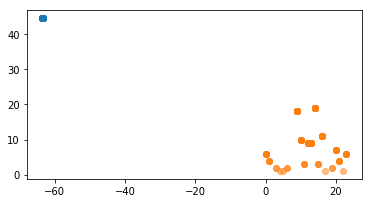

In [224]:
gdf.plot()
plt.scatter(x=r['hour'],y=r['Counts'],alpha=0.5)

In [194]:
a = dict(r['hour'].value_counts())

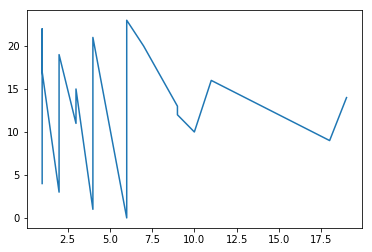

In [195]:
plt.plot(a.values(),a.keys())

**Q5**
Concept drift detection
Referenced from: https://scikit-multiflow.github.io/scikit-multiflow/skmultiflow.drift_detection.html

In this, change is detected as it works on a threshold value and also on observed mean. Hence, if the observed mean increases a threshold value, then change is detected.
The smaller the delta, the more sensitive it becomes to change. In this, the default value of delta is 0.005, but it is taken to be 0.0003 to make it more receptive to change. The number of ais calls to the port2 has been used to detect change in this. 

In [219]:
from skmultiflow.drift_detection import PageHinkley
phk = PageHinkley(delta=0.0003)
cntList = list(r['Counts'])
for i in range(0,len(cntList)):
    phk.add_element(cntList[i])
    if phk.detected_change():
        print('Change detected in data: ' + str(cntList[i]) + ' - at index: ' + str(i))

Change detected in data: 19 - at index: 41
Change detected in data: 18 - at index: 70
